In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("iris_linear 1.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Assuming the dataset is loaded into a DataFrame called 'data'
# Define features and labels
X = data[['sepal_length', 'sepal_width']] # Using only sepal_length and sepal_width as features
y= data['target']
print("Features (X):")
print(X.head())

Features (X):
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [ ]:
# Encode target labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert string labels to integers



In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train an SVM classifier (using a linear kernel for simplicity)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
(205, 235)


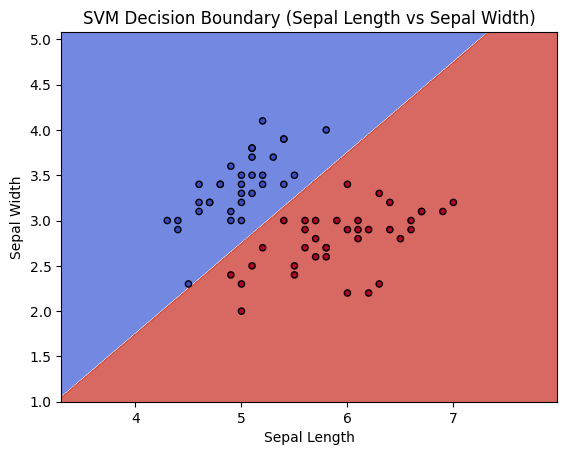

In [ ]:
# Define the decision boundary plotting function
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh, the distance between each adjacent point in the grid is 0.02 units.
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    # np.c_ function in numpy ,It is used to combine multiple arrays into a single array by stacking them column-wise.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel() function in NumPy is used to flatten a multi-dimensional array into a one-dimensional array.
    Z = Z.reshape(xx.shape)
    print(Z)
    print(Z.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # alpha is transparency
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=20) #s = size of point
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary (Sepal Length vs Sepal Width)')
    plt.show()

# Plot the decision boundary for the trained model
plot_decision_boundary(X_train, y_train, model)